In [1]:
import os
from IPython.display import Image
import png

import cv2

import numpy
from math import *

from caustics import *


In [2]:
# if input image is in range 0..1, please first multiply img by 255
# assume image is ndarray of shape [height, width, channels] where channels can be 1, 3 or 4
def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.png', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

In [3]:
import ipywidgets as widgets

width_slider = widgets.IntSlider(
    value=1024,
    min=100,
    max=2048,
    step=1,
    description='Image resolution:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

h_slider = widgets.FloatSlider(
    value=1,
    min=-1,
    max=1,
    step=0.001,
    description='h',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='f'
)

In [4]:
out = widgets.Output(layout={'border': '1px solid black'})


def EvalImage(change):
    with out:
        out.clear_output()
        width = width_slider.value
        src = CreateLUT( width )

        imshow(src)

display(width_slider)
display(h_slider)
display( out )
width_slider.observe( EvalImage, names="value" )
h_slider.observe( EvalImage, names="value" )
#EvalImage([])

IntSlider(value=1024, description='Image resolution:', max=2048, min=100)

FloatSlider(value=1.0, description='h', max=1.0, min=-1.0, readout_format='f', step=0.001)

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

In [5]:
def imload(path):
    img = cv2.imread(path)
    return img

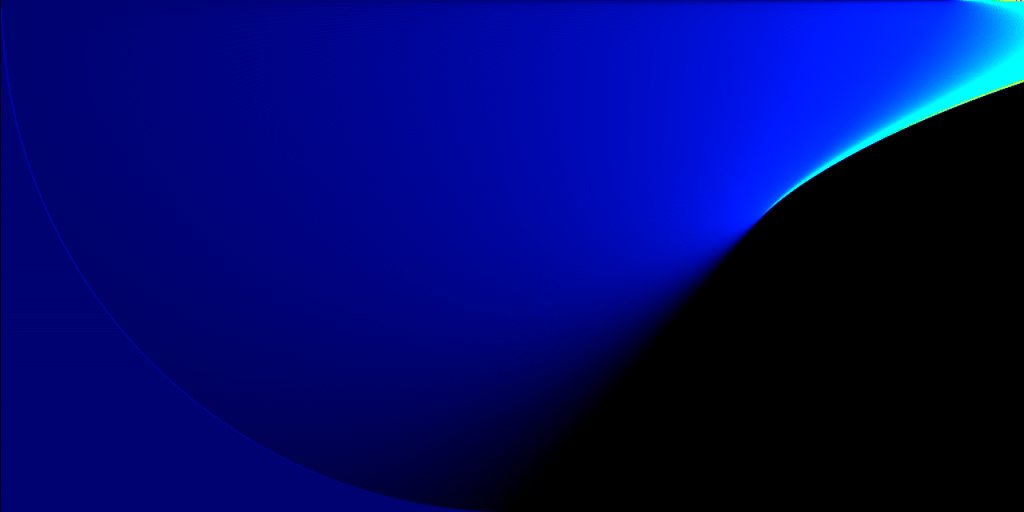

In [6]:
imshow( imload('causticsLUT.png') )

In [13]:
import ipywidgets as widgets

out2 = widgets.Output(layout={'border': '1px solid black'})

width_slider2 = widgets.IntSlider(
    value=200,
    min=100,
    max=2048,
    step=1,
    description='Image resolution:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

h_slider2 = widgets.FloatSlider(
    value=0.5,
    min=0,
    max=1,
    step=0.001,
    description='h',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='f'
)

angle_slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=pi,
    step=0.001,
    description='angle',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='f'
)

lut = imload('causticsLUT.png')

def EvalSlice(change):
    with out2:
        out2.clear_output()
        width = width_slider2.value
        src = CreateSlice( lut, width, h_slider2.value, angle_slider.value )

        imshow(src)

display(width_slider2)
display(h_slider2)
display(angle_slider)
display( out2 )
width_slider2.observe( EvalSlice, names="value" )
h_slider2.observe( EvalSlice, names="value" )
angle_slider.observe( EvalSlice, names="value" )
#EvalImage([])

IntSlider(value=200, description='Image resolution:', max=2048, min=100)

FloatSlider(value=0.5, description='h', max=1.0, readout_format='f', step=0.001)

FloatSlider(value=0.0, description='angle', max=3.141592653589793, readout_format='f', step=0.001)

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

In [ ]:
video_res = 1024

out = cv2.VideoWriter('caustics.mp4',cv2.VideoWriter_fourcc('F','M','P','4'), 30, (video_res,video_res), True)
 
for i in range(0, 140):
    slice = CreateSlice( lut, video_res, 0.55, pi*(i/200))
    out.write(slice.astype('i1'))
    print( i )
out.release()

0
1
2
3
4
5
6
